# OpenCV YOLO v3

> ## Image Object Detection

* Pretrained 모델 파일 로드 후 OpenCV 기반 Object Detection 수행 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Image File Download

* KIA.jpg 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/KIA.jpg

--2023-04-14 14:04:13--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/KIA.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65805 (64K) [image/jpeg]
Saving to: ‘KIA.jpg’

KIA.jpg             100%[===================>]  64.26K  --.-KB/s    in 0.003s  

2023-04-14 14:04:13 (23.1 MB/s) - ‘KIA.jpg’ saved [65805/65805]



* KIA.jpg 확인

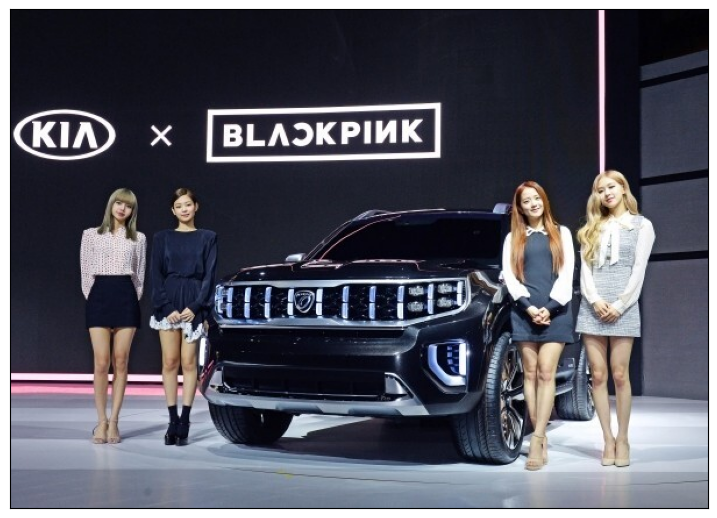

Image Shape: (429, 600, 3)


In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('/content/KIA.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (9, 9))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

print('Image Shape:', img.shape)

# II. Object Detection API Download

> ## 1) Pretrained Model Download

* https://pjreddie.com/darknet/yolo
 - https://pjreddie.com/media/files/yolov3.weights
 - https://pjreddie.com/media/files/yolov3-tiny.weights

* yolov3.weights 다운로드

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-04-14 14:04:14--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  44.4MB/s    in 5.7s    

2023-04-14 14:04:20 (41.6 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



* yolov3-tiny.weights 다운로드

In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2023-04-14 14:04:20--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  30.7MB/s    in 1.1s    

2023-04-14 14:04:21 (30.7 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



* 결과 확인

In [ ]:
!ls -l /content

total 276876
-rw-r--r-- 1 root root     65805 Apr 14 14:04 KIA.jpg
drwxr-xr-x 1 root root      4096 Apr 12 13:34 sample_data
-rw-r--r-- 1 root root  35434956 May  6  2018 yolov3-tiny.weights
-rw-r--r-- 1 root root 248007048 Mar 25  2018 yolov3.weights


> ## 2) Model Configuration Download

* https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
* https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true

* yolov3.cfg 다운로드

In [ ]:
!wget -O /content/yolov3.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true

--2023-04-14 14:04:22--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2023-04-14 14:04:22--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg [following]
--2023-04-14 14:04:22--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


* yolov3-tiny.cfg 다운로드

In [ ]:
!wget -O /content/yolov3-tiny.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true

--2023-04-14 14:04:22--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3-tiny.cfg [following]
--2023-04-14 14:04:22--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3-tiny.cfg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3-tiny.cfg [following]
--2023-04-14 14:04:22--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3-tiny.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awa

* 결과 확인

In [ ]:
!ls -l /content

total 276892
-rw-r--r-- 1 root root     65805 Apr 14 14:04 KIA.jpg
drwxr-xr-x 1 root root      4096 Apr 12 13:34 sample_data
-rw-r--r-- 1 root root      8342 Apr 14 14:04 yolov3.cfg
-rw-r--r-- 1 root root      1915 Apr 14 14:04 yolov3-tiny.cfg
-rw-r--r-- 1 root root  35434956 May  6  2018 yolov3-tiny.weights
-rw-r--r-- 1 root root 248007048 Mar 25  2018 yolov3.weights


# III. Configuration and Model load

* cv2.dnn.readNetFromDarknet( )

In [ ]:
cv_net_yolo = cv2.dnn.readNetFromDarknet('/content/yolov3.cfg', 
                                         '/content/yolov3.weights')

# IV. Class ID Setting

* COCO Dataset

> ## 1) OpenCV - TensorFlow

* SSD

In [ ]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                       11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                       21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                       31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                       41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                       51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                       61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                       71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

# V. Inference 수행

> ## 1) get_detected_img( ) 정의

In [ ]:
import numpy as np
import time

def get_detected_img(cv_net, img_array, conf_threshold, nms_threshold, is_print = True):

    rows = img_array.shape[0]
    cols = img_array.shape[1]
    
    draw_img = img_array.copy()
    
    # Darknet Layer: 13 x 13, 26 x 26, 52 x 52 Detected Output
    layer_names = cv_net.getLayerNames()
    outlayer_names = [layer_names[i - 1] for i in cv_net.getUnconnectedOutLayers()]
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, 
                                          scalefactor = 1/255.0, 
                                          size = (416, 416), 
                                          swapRB = True, 
                                          crop = False))
    start = time.time()

    # Object Detection결과
    cv_outs = cv_net.forward(outlayer_names)
    layerOutputs = cv_net.forward(outlayer_names)

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    class_ids = []
    confidences = []
    boxes = []

    # Detection 정보 추출 및 시각화 
    for ix, output in enumerate(cv_outs):
        # Detected된 Object별 iteration
        for jx, detection in enumerate(output):
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            # Confidence Threshold
            if confidence > conf_threshold:
                center_x = int(detection[0] * cols)
                center_y = int(detection[1] * rows)
                width = int(detection[2] * cols)
                height = int(detection[3] * rows)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)

                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])
    
    # NMS Filtering
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    if len(idxs) > 0:
        for i in idxs.flatten():
            box = boxes[i]
            left = box[0]
            top = box[1]
            width = box[2]
            height = box[3]

            caption = "{}: {:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])

            cv2.rectangle(draw_img, (int(left), int(top)), (int(left + width), int(top + height)), color = green_color, thickness = 2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)

    if is_print:
        print('Detection Time:',round(time.time() - start, 2), 'Seconds')
    return draw_img

> ## 2) get_detected_img( ) 실행

Detection Time: 8.01 Seconds


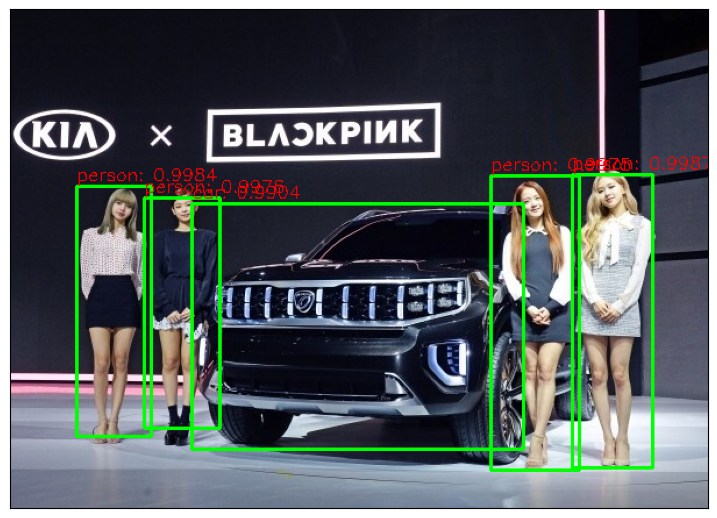

In [ ]:
# Image Load
img = cv2.imread('/content/KIA.jpg')


# Model Load
cv_net_yolo = cv2.dnn.readNetFromDarknet('/content/yolov3.cfg', 
                                         '/content/yolov3.weights')

# Tiny Model Load
# cv_net_yolo = cv2.dnn.readNetFromDarknet('/content/yolov3-tiny.cfg', 
#                                          '/content/yolov3-tiny.weights')

# Object Detection
conf_threshold = 0.5
nms_threshold = 0.4

# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net_yolo, img, conf_threshold = conf_threshold, nms_threshold = nms_threshold, is_print = True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (9, 9))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

# VI. 추가 Image 

> ## 1) Image Load

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/image/AS.jpg

--2023-04-14 14:04:32--  https://raw.githubusercontent.com/rusita-ai/pyData/master/image/AS.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 268308 (262K) [image/jpeg]
Saving to: ‘AS.jpg’

AS.jpg              100%[===================>] 262.02K  --.-KB/s    in 0.005s  

2023-04-14 14:04:32 (47.4 MB/s) - ‘AS.jpg’ saved [268308/268308]



> ## 2) Object Detection

image shape: (800, 1200, 3)
Detection Time: 3.81 Seconds


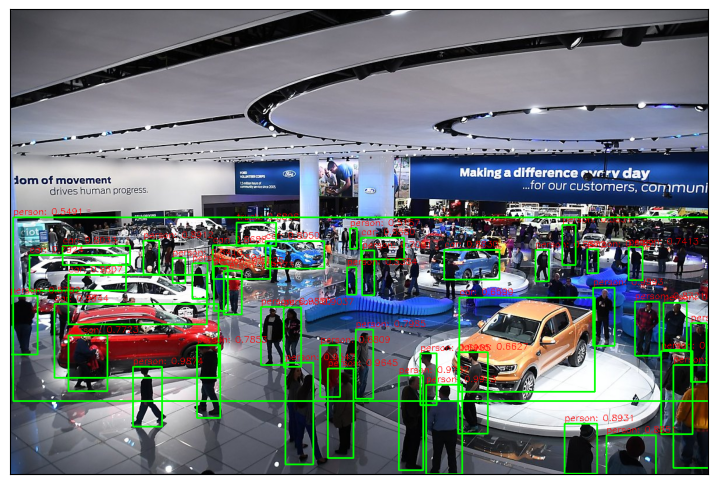

In [ ]:
# Image Load
img = cv2.imread('/content/AS.jpg')
print('image shape:', img.shape)

# Model Load
cv_net_yolo = cv2.dnn.readNetFromDarknet('/content/yolov3.cfg', 
                                         '/content/yolov3.weights')

# Tiny Model Load
# cv_net_yolo = cv2.dnn.readNetFromDarknet('/content/yolov3-tiny.cfg', 
#                                          '/content/yolov3-tiny.weights')

# Object Detection
conf_threshold = 0.5
nms_threshold = 0.4

# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net_yolo, img, conf_threshold = conf_threshold, nms_threshold = nms_threshold, is_print = True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (9, 9))
plt.imshow(img_rgb)
plt.xticks([])
plt.yticks([])
plt.show()

# 
# 
# 
# The End
# 
# 
# 